# Nobel prizes

## 1. Loading the data
<p><img style="float: right;margin:5px 20px 5px 1px; max-width:250px" src="https://s3.amazonaws.com/assets.datacamp.com/production/project_441/img/Nobel_Prize.png"></p>
<p>The Nobel Prize is perhaps the world's most well known scientific award. Except for the honor, prestige and substantial prize money the recipient also gets a gold medal showing Alfred Nobel (1833 - 1896) who established the prize. Every year it's given to scientists and scholars in the categories chemistry, literature, physics, physiology or medicine, economics, and peace. The first Nobel Prize was handed out in 1901, and at that time the Prize was very Eurocentric and male-focused, but nowadays it's not biased in any way whatsoever. Surely. Right?</p>
<p>Well, we're going to find out! The Nobel Foundation has made a dataset available of all prize winners from the start of the prize, in 1901, to 2016. Let's load it in and take a look.</p>

In [155]:
# Loading in required libraries: you will need pandas, seaborn and numpy
# ... YOUR CODE FOR TASK 1 ...

import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
sns.set()


# Reading in the Nobel Prize data
nobel = pd.read_csv('datasets/nobel.csv')
nobel


# Explore the data - are there missing values? How many entries do we have?
# ... YOUR CODE FOR TASK 1 ...

nobel.info()
nobel.head()
nobel.isnull().sum()
nobel.shape



<class 'pandas.core.frame.DataFrame'>
RangeIndex: 911 entries, 0 to 910
Data columns (total 18 columns):
year                    911 non-null int64
category                911 non-null object
prize                   911 non-null object
motivation              823 non-null object
prize_share             911 non-null object
laureate_id             911 non-null int64
laureate_type           911 non-null object
full_name               911 non-null object
birth_date              883 non-null object
birth_city              883 non-null object
birth_country           885 non-null object
sex                     885 non-null object
organization_name       665 non-null object
organization_city       667 non-null object
organization_country    667 non-null object
death_date              593 non-null object
death_city              576 non-null object
death_country           582 non-null object
dtypes: int64(2), object(16)
memory usage: 128.2+ KB


(911, 18)

## Exploring the data

### What are the features?


year
category  
prize   
motivation  
prize_share  
laureate_id  
laureate_type  
full_name  
birth_date  
birth_city  
birth_country  
sex  
organization_name  
organization_city  
organization_country  
death_date  
death_city  
death_country  


## How many entries do we have?

Dataset has about 911 rows and 18 coulms, which has details about the nobel prize winners name, birth date, country , and prize details.

## Are the missing values?

Yes, there are values missing

## 2. So, who gets the Nobel Prize?
<p>Just looking at the first couple of prize winners, or Nobel laureates as they are also called, we already see a celebrity: Wilhelm Conrad Röntgen, the guy who discovered X-rays. And actually, we see that all of the winners in 1901 were guys that came from Europe. But that was back in 1901, looking at all winners in the dataset, from 1901 to 2016, which sex and which country is the most commonly represented? </p>
<p>(For <em>country</em>, we will use the <code>birth_country</code> of the winner, as the <code>organization_country</code> is <code>NaN</code> for all shared Nobel Prizes.)</p>

In [157]:
# Display the number of (possibly shared) Nobel Prizes handed
# out between 1901 and 2016
# ... YOUR CODE FOR TASK 2 ...

number_of_possibly_shared = nobel["organization_country"]
print(number_of_possibly_shared.isnull().sum())


# Display the number of prizes won by male and female recipients.
# ... YOUR CODE FOR TASK 2 ...

number_of_prizes_won = nobel['sex'].value_counts().head(10)
number_of_prizes_won
sex=nobel['sex'].value_counts()
sex

# Display the number of prizes won by the top 10 nationalities.
# ... YOUR CODE FOR TASK 2 ...

ctry=nobel['birth_country'].value_counts().head(10)
ctry
cat=nobel['category'].value_counts().head(10)
cat

244


Medicine      211
Physics       204
Chemistry     175
Peace         130
Literature    113
Economics      78
Name: category, dtype: int64

## Total possible shares  
244
  
## number of prizes won by male and female recipients    
Male      836    
Female     49    
Name: sex, dtype: int64  
        
## number of prizes won by the top 10 nationalities    
        
United States of America    259  
United Kingdom               85  
Germany                      61  
France                       51  
Sweden                       29  
Japan                        24  
Canada                       18  
Netherlands                  18  
Italy                        17  
Russia                       17  
Name: laureate_id, dtype: int64 
  
  
 ## Interpretation  
 
* the number of possibly sheared nobel prices is 244
* there are 49 females and 836 males who won the nobel price
* the most represented country is united states of america with 259 awards   

Which countries win most often?

united states of america 259  
united kingdom 85  
germany 61  
france 51  
sweden 29  
japan 26  
canada 18  
netherlands 18  
italy 17  
russia 17

In [134]:
# Display the number of (possibly shared) Nobel Prizes handed
# out between 1901 and 2016
# ... YOUR CODE FOR TASK 2 ...
print(len(nobel['Prize Share']))



# Display the number of prizes won by male and female recipients.
# ... YOUR CODE FOR TASK 2 ...


# Display the number of prizes won by the top 10 nationalities.
# ... YOUR CODE FOR TASK 2 ...


885

# Which countries win most often?

## Display the number of (possibly shared) Nobel Prizes handed out between 1901 and 2016
Name: prize_share, Length: 911, dtype: object

## Display the number of prizes won by male and female recipients.
Male      836  
Female     49  
Name: sex, dtype: int64  

## Display the number of prizes won by the top 10 nationalities.
United States of America    259  
United Kingdom               85  
Germany                      61  
France                       51  
Sweden                       29  
Japan                        24  
Netherlands                  18  
Canada                       18  
Italy                        17  
Russia                       17  
Name: birth_country, dtype: int64  

## Display the category of prizes won by the top 10 nationalities.
Medicine      211  
Physics       204  
Chemistry     175  
Peace         130  
Literature    113  
Economics      78  
Name: category, dtype: int64  


## 3. USA dominance
<p>Not so surprising perhaps: the most common Nobel laureate between 1901 and 2016 was a man born in the United States of America. But in 1901 all the winners were European. When did the USA start to dominate the Nobel Prize charts?</p>
    

In [165]:
# Calculating the proportion of USA born winners per decade
# Calculating the proportion of USA born winners per decade

nobel['Usa_native'] = nobel['birth_country']=="United States of America"
nobel['Decade'] = (np.floor(nobel['year']/10)*10).astype(int)
prop_usa = nobel.groupby('Decade',as_index=False)['Usa_native'].mean()


# Display the proportions of USA born winners per decade
# ... YOUR CODE FOR TASK 3 ...

print(prop_usa)

    Decade  Usa_native
0     1900    0.017544
1     1910    0.075000
2     1920    0.074074
3     1930    0.250000
4     1940    0.302326
5     1950    0.291667
6     1960    0.265823
7     1970    0.317308
8     1980    0.319588
9     1990    0.403846
10    2000    0.422764
11    2010    0.292683


# Display the proportions of USA born winners per decade

decade	usa_born_winner  
0   1900    0.017544  
1   1910	0.075000  
2   1920	0.074074  
3   1930	0.250000  
4   1940	0.302326  
5   1950	0.291667  
6   1960	0.265823  
7   1970	0.317308  
8   1980	0.319588  
9   1990	0.403846  
10   2000	0.422764  
11   2010	0.292683
  
  
The us started dominating in 1930 decade with 25 percent of overall awards

## 4. USA dominance, visualized
<p>A table is OK, but to <em>see</em> when the USA started to dominate the Nobel charts we need a plot!</p>

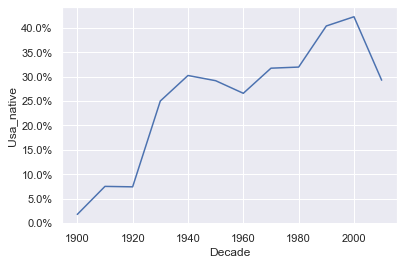

In [95]:
#using seaborn, plot the proportion of US winners by decade

sns_plot = sns.lineplot(data=prop_usa, x='Decade',y='Usa_native')

# Adding %-formatting to the y-axis

from matplotlib.ticker import PercentFormatter

sns_plot.yaxis.set_major_formatter(PercentFormatter(1.0))

What can you conclude from the graph?

we can conclude that the USA atarted dominating in the decade of 1930

## 5. What is the gender of a typical Nobel Prize winner?
<p>So the USA became the dominating winner of the Nobel Prize first in the 1930s and had kept the leading position ever since. But one group that was in the lead from the start, and never seems to let go, are <em>men</em>. Maybe it shouldn't come as a shock that there is some imbalance between how many male and female prize winners there are, but how significant is this imbalance? And is it better or worse within specific prize categories like physics, medicine, literature, etc.?</p>

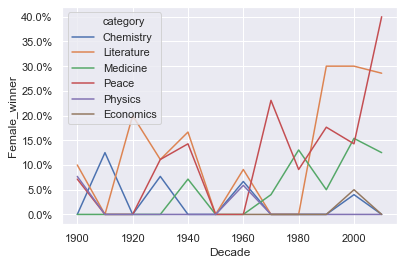

In [111]:
# Calculating the proportion of female laureates per decade

nobel['Female_winner'] = nobel['sex']=="Female"
nobel['Decade'] = (np.floor(nobel['year']/10)*10).astype(int)
prop_female = nobel.groupby(['Decade','category'],as_index=False)['Female_winner'].mean()


# Plot proportion of female winners by decade, grouped by prize category (physics, medicine, etc)
# ... YOUR CODE FOR TASK 5 ...

female_plot = sns.lineplot(x='Decade', y='Female_winner', hue='category', data=prop_female)
female_plot.yaxis.set_major_formatter(PercentFormatter(1.0))

from the graph above we can conclude that females usally get awards fom peace

## 6. The first woman to win the Nobel Prize
<p>The plot above is a bit messy as the lines are overplotting. But it does show some interesting trends and patterns. Overall the imbalance is pretty large with physics, economics, and chemistry having the largest imbalance. Medicine has a somewhat positive trend, and since the 1990s the literature prize is also now more balanced. The big outlier is the peace prize during the 2010s, but keep in mind that this just covers the years 2010 to 2016.</p>
<p>Given this imbalance, who was the first woman to receive a Nobel Prize? And in what category?</p>


In [113]:
# Picking out the first woman to win a Nobel Prize
# ... YOUR CODE FOR TASK 6 ...

first_female=nobel[nobel['sex']=="Female"].nsmallest(1,'year')
first_female[['year','category','full_name','prize']]

,year,category,full_name,prize
19,1903,Physics,"Marie Curie, née Sklodowska",The Nobel Prize in Physics 1903


the first female winner was Marie Curie in Physics category

## 7. Repeat laureates
<p>For most scientists/writers/activists a Nobel Prize would be the crowning achievement of a long career. But for some people, one is just not enough, and few have gotten it more than once. Who are these lucky few? (Having won no Nobel Prize myself, I'll assume it's just about luck.)</p>

In [126]:
# Selecting the laureates that have received 2 or more prizes.
# ... YOUR CODE FOR TASK 7 ...

multiple_winners = pd.DataFrame(nobel["full_name"])
dublicates = multiple_winners[multiple_winners.duplicated()]
dublicates


,full_name
62,"Marie Curie, née Sklodowska"
215,Comité international de la Croix Rouge (Intern...
340,Linus Carl Pauling
348,Comité international de la Croix Rouge (Intern...
424,John Bardeen
505,Frederick Sanger
523,Office of the United Nations High Commissioner...


## How many people have received 2 or more prizes?  
6 people have the nobel prize more than once

## 8. How old are you when you get the prize?
<p>The list of repeat winners contains some illustrious names! We again meet Marie Curie, who got the prize in physics for discovering radiation and in chemistry for isolating radium and polonium. John Bardeen got it twice in physics for transistors and superconductivity, Frederick Sanger got it twice in chemistry, and Linus Carl Pauling got it first in chemistry and later in peace for his work in promoting nuclear disarmament. We also learn that organizations also get the prize as both the Red Cross and the UNHCR have gotten it twice.</p>
<p>But how old are you generally when you get the prize?</p>

In [158]:
# Converting birth_date from String to datetime

nobel['birth_date'] = pd.to_datetime(nobel['birth_date'])
nobel.birth_date.describe()

# Calculating the age of Nobel Prize winners
nobel['age'] =nobel['year']-nobel['birth_date'].dt.year

# What is the mean age of winners and it's standard devation? What is the median age?
round(nobel['age'].describe())

count    883.0
mean      59.0
std       12.0
min       17.0
25%       50.0
50%       60.0
75%       69.0
max       90.0
Name: age, dtype: float64

## mean age of winners and it's standard devation? What is the median age  
* the mean age is 59 years
* with median 50 years
* and standard deviation of 12


## 9. Age differences between prize categories


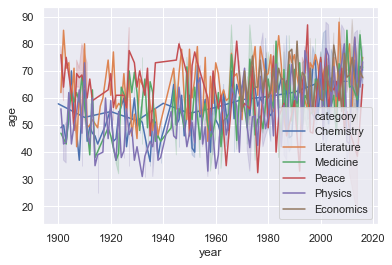

In [177]:
#Plot the age of nobel candidates by decade
#YOUR CODE FOR TASK 9 ...

ageperdecade=nobel.groupby('Decade',as_index=False).mean()[['Decade','age']]
sns.lineplot(data=ageperdecade,x='Decade',y='age')
ageperdecade

# Plot the age of nobel candidates by decade and prize category

sns.lineplot('year','age',data=nobel, hue='category')




## What can you conclude about the age at which people win different types of Nobel Prizes? 
  
I can conclude that a person is most likely to get the award if they are between 50 and 70 years

## 10. Oldest and youngest winners
<p>In the peace category there is a winner around 2010 that seems exceptionally young. This begs the questions, who are the oldest and youngest people ever to have won a Nobel Prize?</p>

In [176]:
#code for selecting young and old persons
nobel[['age','full_name']].min()
nobel[['age','full_name']].max()

age                     90
full_name    Élie Ducommun
dtype: object

## The youngest to win a Nobel Prize  
age                         17  
full_name    A. Michael Spence  
dtype: object

## The oldest to win a Nobel Prize    
age                     90  
full_name    Élie Ducommun  
dtype: object

## Congratulations! You've reached the end of the challenge!